# Problema 1 (tema 3)

Este problema es un ejemplo **avanzado** sobre el uso de gráficas en Python. En él se emplean técnicas como:
- Dibujo de polígonos, usando objetos de tipo *Polygon* [[1]](http://matplotlib.org/api/patches_api.html#matplotlib.patches.Polygon), [[2]](http://matplotlib.org/examples/shapes_and_collections/artist_reference.html).
- Manipulación de mapas de colores (ver todas las posibilidades de colores en [colormaps](http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps))
- Manipulación de los ejes de coordenadas (usando una extensión de Matplotlib llamada [mpl_tookits](http://matplotlib.org/1.4.3/mpl_toolkits/index.html))

Se plantea:

1. Dibujar la gráfica de la función $f(x)=-(x-x_0)^2+y_0$, para $x_0=1$, $y_0=20$, en el intervalo $[a_0,b_0]=[x_0-0.5, x_0+3.5]$.
2. Colorear el área que encerrada por la gráfica de $f$ y el eje $OX$ en el intervalo $[a,b]=[a_0+0.3, b_0-1.3]$.
3. Dibujar un polígono en $[a,b]$ definido por puntos $(x_i,f(x_i))$ donde $\{x_i\}$ está formado por 50 puntos equiespaciados en $[a,b]$. Este polígono representará al área encerrado por $f$, es decir, la integral definida en $[a,b]$.
3. Dibujar, utilizando un objeto de tipo *Polygon*, el área del trapecio definido en el intervalo $[a,b]$ con alturas $f(a)$ y $f(b)$ (y que representa a la f.c. del trapecio). Haciendo que este nuevo polígono se situará sobre el anterior. Haciendo que el nuevo polígono tenga un color distinto al antiguo, se podrá ver la diferencia entre el área de la función y el trapecio que representa la f.c.

In [1]:
from __future__ import division, print_function # Sólo para Python 2.x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Definimos algunas funciones que nos serán de utilidad

In [ ]:
def construir_ejes():
    """Función que construye y devuelve un sistema de ejes para nuestra gráfica. 
    Este sistema de ejes es adaptado a nuestro gusto. Para ello se usa un objeto 
    de tipo "SupblotZero", del módulo mpl_toolkits.
    """
    from mpl_toolkits.axes_grid.axislines import SubplotZero
    # 1. Crear ejes
    plt.rc("font", size=22) # Seleccionar el tamaño de las etiquetas
    fig = plt.figure(1, figsize=(9,6), dpi=600) # Seleccionar el tamaño de la figura
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)
    # 2. Hacer visibles los ejes OX, OY y ponerles una flecha ->
    for direction in ["xzero", "yzero"]:
        ax.axis[direction].set_visible(True)
        ax.axis[direction].set_axisline_style("-|>")
    # 3.- Hacer invisibles los 4 ejes que definen la caja exterior
    for direction in ["left", "right", "bottom", "top"]:
        ax.axis[direction].set_visible(False)
        
    # Devolver el sistema de ejes que fue definido
    return ax

def dibujar_area(n_intervalos, color=0.5):
    """Dibujar el área encerrada bajo la función f, 
    dentro de un polígono con n puntos (x_i, f(x_i)),
    donde n = n_intervalos+1"""
    ix = np.linspace(a, b, n_intervalos)
    iy = f(ix)
    # Definir una lista de puntos (x_i, y_i):
    vertices = [(a,0)] + list(zip(ix,iy)) + [(b,0)]  
    # Seleccionar mapa de colores "Blues":
    blues = plt.get_cmap('Blues') 
    # Dibujar el polígono:
    poligono = plt.Polygon(vertices, facecolor=blues(color), edgecolor='k')
    ax.add_patch(poligono)

### 2. Utilizamos las funciones anteriores para dibujar la gráfica

[]

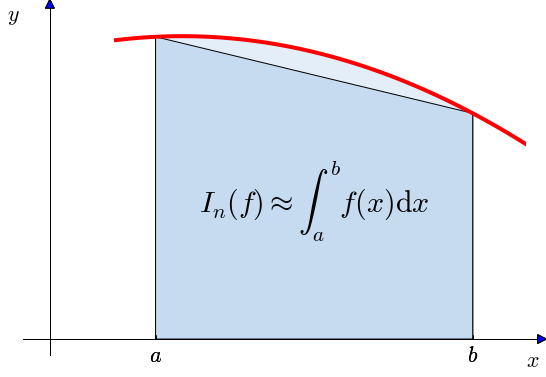

In [6]:
x0 = 1
y0 = 19
f = lambda x: -(x-x0)**2 + y0
a0, b0 = x0-0.5, x0+3.5 # Intervalo donde representar la gráfica de f
a, b = a0+0.3, b0-1.3 # Intervalo de integración


# Obtenemos el sistema de ejes, hecho a nuestro gusto
ax = construir_ejes()

# Dibujamos la gráfica de f
x = np.linspace(a0, b0, 600)
y = f(x)
plt.plot(x, y, linewidth=4, c='r')

# Dibujamos el "área de f" y el trapecio inscrito
dibujar_area(50, color=0.1)
dibujar_area(2, color=0.25)

# Dibujamos el texto en LaTeX
plt.text(0.5 * (a + b), y0-11,
     r"$I_n(f) \approx \int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=30)

# Personalizamos los ejes, definieniedo su tamaño, las etiquetas "x", "y" y el intervalo [a,b]
plt.axis([-0.2, x0+2.6, -1, f(x0)+1])
plt.figtext(0.9, 0.1, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.set_xticks((a,b))
ax.set_xticklabels(('$a$','$b$'))
ax.set_yticks([])